In [2]:
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

from ott.geometry import pointcloud
from ott.problems.quadratic import quadratic_problem
from ott.solvers.quadratic import gromov_wasserstein, gromov_wasserstein_lr
from jax import config

import ott
print(ott.__version__)

config.update("jax_enable_x64", True)

def create_points(rng: jax.Array, n: int, m: int, d1: int, d2: int):
    rngs = jax.random.split(rng, 5)
    x = jax.random.uniform(rngs[0], (n, d1))
    y = jax.random.uniform(rngs[1], (m, d2))
    a = jax.random.uniform(rngs[2], (n,))
    b = jax.random.uniform(rngs[3], (m,))
    a = a / jnp.sum(a)
    b = b / jnp.sum(b)
    z = jax.random.uniform(rngs[4], (m, d1))
    return x, y, a, b, z


rng = jax.random.PRNGKey(0)
n, m, d1, d2 = 10_000, 15_000, 200, 300
x, y, a, b, z = create_points(rng, n, m, d1, d2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.4.5.dev31+ge054ff6


In [3]:
geom_xx = pointcloud.PointCloud(x)
geom_yy = pointcloud.PointCloud(y)
geom_xy = pointcloud.PointCloud(x, z)
prob = quadratic_problem.QuadraticProblem(
    geom_xx,
    geom_yy,
    geom_xy=geom_xy,
    a=a,
    b=b,
    fused_penalty=1.0,
)

In [4]:
solver = gromov_wasserstein_lr.LRGromovWasserstein(rank=100,initializer="random")
ot_gwlr = solver(prob)

In [18]:
ot_gwlr.linear_state.in

Text(0.5, 1.0, 'ott 0.4.3, init `rank2`')

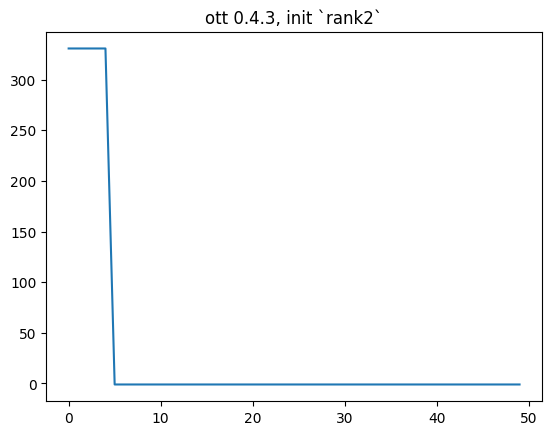

In [11]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.3, init `rank2`")

Text(0.5, 1.0, 'ott 0.4.3, init `random`')

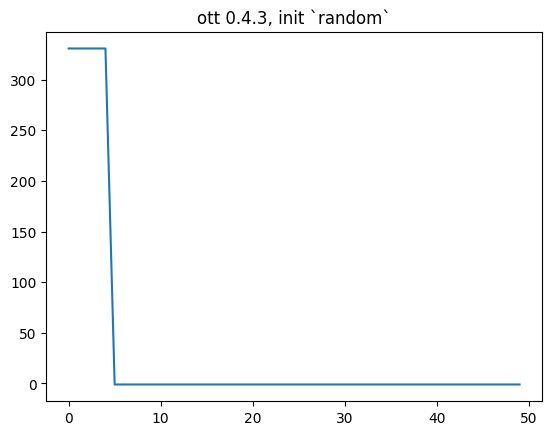

In [13]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.3, init `random`")

Text(0.5, 1.0, 'ott 0.4.5, init `rank2`')

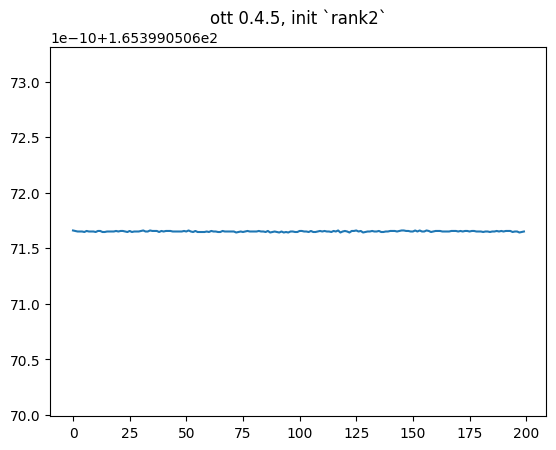

In [5]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.5, init `rank2`")

Text(0.5, 1.0, 'ott 0.4.5, init `random`')

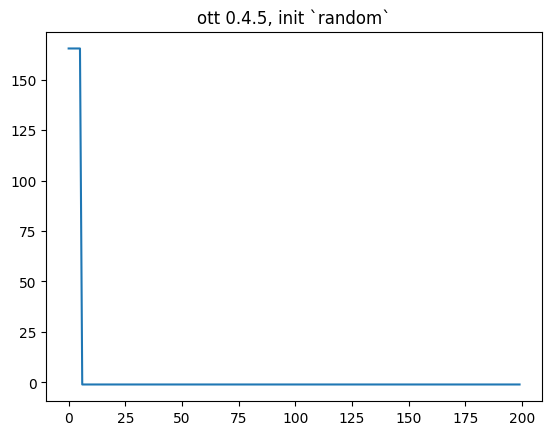

In [7]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.5, init `random`")

Text(0.5, 1.0, 'ott 0.4.4, init `rank2`')

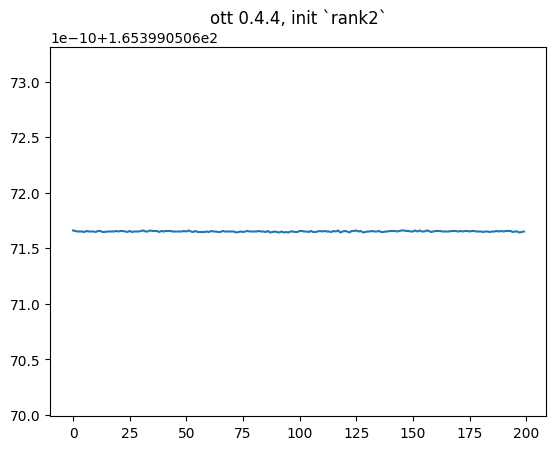

In [7]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.4, init `rank2`")

Text(0.5, 1.0, 'ott 0.4.4, init `random`')

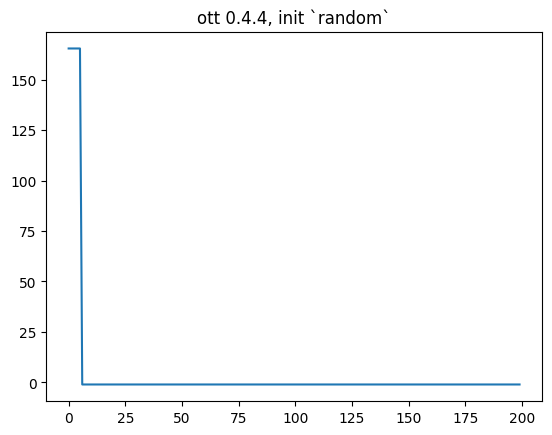

In [11]:
plt.plot(np.arange(len(ot_gwlr.costs)), ot_gwlr.costs)
plt.title("ott 0.4.4, init `random`")